# Data import and cleaning

Installing packages

In [1]:
import pyodbc
import pandas as pd
import math
import datetime as dt
import re
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

1) Data from Garmin csv

In [2]:
df = pd.read_csv('C:\\Users\\kasutaja\\Documents\\Data\\DWH\\garmin-connect-export-master\\garmin-connect-export-master\\2023-02-14_garmin_connect_export\\activities.csv',sep=",")

In [3]:
pd.set_option('display.max_columns', None)
df.head(3)

,Start Time,End Time,Activity ID,Activity Name,Description,Location Name,Time Zone,Offset,Duration (h:m:s),Elapsed Duration (h:m:s),Moving Duration (h:m:s),Activity Parent,Activity Type,Event Type,Device,Gear,Privacy,File Format,Distance (km),Average Speed (km/h),Average Speed (km/h or min/km),Average Moving Speed (km/h),Average Moving Speed (km/h or min/km),Max. Speed (km/h),Max. Speed (km/h or min/km),Elevation Gain (m),Elevation Loss (m),Elevation Min. (m),Elevation Max. (m),Elevation Corrected,Begin Latitude (°DD),Begin Longitude (°DD),End Latitude (°DD),End Longitude (°DD),Max. Heart Rate (bpm),Average Heart Rate (bpm),Calories,VO2max,Aerobic Training Effect,Anaerobic Training Effect,Avg. Run Cadence,Max. Run Cadence,Stride Length,Steps,Avg. Cadence (rpm),Max. Cadence (rpm),Strokes,Avg. Temp (°C),Min. Temp (°C),Max. Temp (°C),Ground Contact Time,GCT Balance (%),lapCount,hasSplits,verticalOscillation,verticalRatio,maxVerticalSpeed
0,2023-02-14T09:11:43+11:00,2023-02-14T10:47:19+11:00,10505883069,Sydney Running,NaN,Sydney,Australia/Sydney,+11:00,01:22:28,01:35:36,01:17:02,Any Activity Type,Running,Uncategorized,fēnix 5S – Sapphire Edition 25.0.0.0,NaN,groups,fit,15.59729,11.3472,05:17,12.148297,04:56,24.184800,02:29,NaN,NaN,5.8,10003.0,False,-33.946473,151.203492,-33.941661,151.208356,153.0,126.0,642.0,NaN,2.3,1.9,166.22,256.0,115.17,13210.0,NaN,NaN,NaN,41.0,41.0,41.0,241.100006,48.810001,NaN,NaN,9.05,8.15,9997.2
1,2023-02-13T16:08:30+11:00,2023-02-13T16:46:33+11:00,10500268624,Sydney Running,NaN,Sydney,Australia/Sydney,+11:00,00:36:06,00:38:03,00:36:06,Any Activity Type,Running,Uncategorized,fēnix 5S – Sapphire Edition 25.0.0.0,NaN,groups,fit,7.31617,12.1572,04:56,12.159839,04:56,13.705200,04:23,NaN,NaN,5.8,10003.0,False,-33.946675,151.203462,-33.946429,151.203395,161.0,148.0,411.0,NaN,3.5,0.7,170.84,217.0,118.61,6148.0,NaN,NaN,NaN,41.0,41.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,4998.6
2,2023-02-11T10:16:37+02:00,2023-02-11T10:25:25+02:00,10486953611,Treadmill Running,NaN,NaN,Europe/Athens,+02:00,00:08:48,00:08:48,00:08:21,Running,Treadmill Running,Uncategorized,fēnix 5S – Sapphire Edition 25.0.0.0,NaN,groups,fit,1.99212,13.5756,04:25,14.314635,04:11,16.729199,03:35,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,146.0,137.0,92.0,NaN,2.0,NaN,166.66,188.0,135.77,1482.0,NaN,NaN,NaN,41.0,41.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 57 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Start Time                             1738 non-null   object 
 1   End Time                               1738 non-null   object 
 2   Activity ID                            1738 non-null   int64  
 3   Activity Name                          1738 non-null   object 
 4   Description                            0 non-null      float64
 5   Location Name                          1346 non-null   object 
 6   Time Zone                              1738 non-null   object 
 7   Offset                                 1738 non-null   object 
 8   Duration (h:m:s)                       1738 non-null   object 
 9   Elapsed Duration (h:m:s)               1738 non-null   object 
 10  Moving Duration (h:m:s)                1657 non-null   object 
 11  Acti

Renaming columns, selecting columns, changing data types, replacing null-values

In [5]:
list(df)

['Start Time',
 'End Time',
 'Activity ID',
 'Activity Name',
 'Description',
 'Location Name',
 'Time Zone',
 'Offset',
 'Duration (h:m:s)',
 'Elapsed Duration (h:m:s)',
 'Moving Duration (h:m:s)',
 'Activity Parent',
 'Activity Type',
 'Event Type',
 'Device',
 'Gear',
 'Privacy',
 'File Format',
 'Distance (km)',
 'Average Speed (km/h)',
 'Average Speed (km/h or min/km)',
 'Average Moving Speed (km/h)',
 'Average Moving Speed (km/h or min/km)',
 'Max. Speed (km/h)',
 'Max. Speed (km/h or min/km)',
 'Elevation Gain (m)',
 'Elevation Loss (m)',
 'Elevation Min. (m)',
 'Elevation Max. (m)',
 'Elevation Corrected',
 'Begin Latitude (°DD)',
 'Begin Longitude (°DD)',
 'End Latitude (°DD)',
 'End Longitude (°DD)',
 'Max. Heart Rate (bpm)',
 'Average Heart Rate (bpm)',
 'Calories',
 'VO2max',
 'Aerobic Training Effect',
 'Anaerobic Training Effect',
 'Avg. Run Cadence',
 'Max. Run Cadence',
 'Stride Length',
 'Steps',
 'Avg. Cadence (rpm)',
 'Max. Cadence (rpm)',
 'Strokes',
 'Avg. Temp (°C

In [6]:
df=df.dropna(axis=1,how='all')
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [c.replace('(', '') for c in df.columns]
df.columns = [c.replace(')', '') for c in df.columns]
df.columns = [c.replace(':', '') for c in df.columns]
df.columns = [c.replace('/', '') for c in df.columns]
df.columns = [c.replace('.', '') for c in df.columns]
df.columns = [c.replace('°', '') for c in df.columns]
df.columns = [c.replace('%', '') for c in df.columns]
df=df[['Start_Time',
 'End_Time',
 'Activity_ID',
 'Activity_Name',
 'Location_Name',
 'Duration_hms',
 'Elapsed_Duration_hms',
 'Moving_Duration_hms',
 'Activity_Parent',
 'Activity_Type',
 'Distance_km',
 'Average_Speed_kmh',
 'Average_Moving_Speed_kmh',
 'Max_Speed_kmh',
 'Max_Heart_Rate_bpm',
 'Average_Heart_Rate_bpm',
 'Calories',
 'VO2max',
 'Aerobic_Training_Effect',
 'Anaerobic_Training_Effect',
 'Avg_Run_Cadence',
 'Max_Run_Cadence',
 'Stride_Length',
 'Steps',
 'Ground_Contact_Time',
 'GCT_Balance_',
 'verticalOscillation',
 'verticalRatio',
 'maxVerticalSpeed']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Start_Time                 1738 non-null   object 
 1   End_Time                   1738 non-null   object 
 2   Activity_ID                1738 non-null   int64  
 3   Activity_Name              1738 non-null   object 
 4   Location_Name              1346 non-null   object 
 5   Duration_hms               1738 non-null   object 
 6   Elapsed_Duration_hms       1738 non-null   object 
 7   Moving_Duration_hms        1657 non-null   object 
 8   Activity_Parent            1738 non-null   object 
 9   Activity_Type              1738 non-null   object 
 10  Distance_km                1634 non-null   float64
 11  Average_Speed_kmh          1634 non-null   float64
 12  Average_Moving_Speed_kmh   1456 non-null   float64
 13  Max_Speed_kmh              1629 non-null   float

In [8]:
df.head()

,Start_Time,End_Time,Activity_ID,Activity_Name,Location_Name,Duration_hms,Elapsed_Duration_hms,Moving_Duration_hms,Activity_Parent,Activity_Type,Distance_km,Average_Speed_kmh,Average_Moving_Speed_kmh,Max_Speed_kmh,Max_Heart_Rate_bpm,Average_Heart_Rate_bpm,Calories,VO2max,Aerobic_Training_Effect,Anaerobic_Training_Effect,Avg_Run_Cadence,Max_Run_Cadence,Stride_Length,Steps,Ground_Contact_Time,GCT_Balance_,verticalOscillation,verticalRatio,maxVerticalSpeed
0,2023-02-14T09:11:43+11:00,2023-02-14T10:47:19+11:00,10505883069,Sydney Running,Sydney,01:22:28,01:35:36,01:17:02,Any Activity Type,Running,15.59729,11.347200,12.148297,24.184800,153.0,126.0,642.0,NaN,2.3,1.9,166.22,256.0,115.17,13210.0,241.100006,48.810001,9.05,8.15,9997.2
1,2023-02-13T16:08:30+11:00,2023-02-13T16:46:33+11:00,10500268624,Sydney Running,Sydney,00:36:06,00:38:03,00:36:06,Any Activity Type,Running,7.31617,12.157200,12.159839,13.705200,161.0,148.0,411.0,NaN,3.5,0.7,170.84,217.0,118.61,6148.0,NaN,NaN,NaN,NaN,4998.6
2,2023-02-11T10:16:37+02:00,2023-02-11T10:25:25+02:00,10486953611,Treadmill Running,NaN,00:08:48,00:08:48,00:08:21,Running,Treadmill Running,1.99212,13.575600,14.314635,16.729199,146.0,137.0,92.0,NaN,2.0,NaN,166.66,188.0,135.77,1482.0,NaN,NaN,NaN,NaN,NaN
3,2023-02-11T09:11:04+02:00,2023-02-11T09:26:08+02:00,10486953117,Indoor Rowing,NaN,00:15:04,00:15:04,NaN,Gym & Fitness Equipment,Indoor Rowing,NaN,NaN,NaN,NaN,102.0,89.0,61.0,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-02-10T09:41:48+02:00,2023-02-10T10:29:27+02:00,10480882362,Treadmill Running,NaN,00:47:39,00:47:39,NaN,Running,Treadmill Running,10.70000,13.474784,NaN,NaN,166.0,146.0,501.0,NaN,3.6,2.4,171.97,181.0,NaN,8128.0,214.399994,48.959999,11.06,NaN,NaN


2) Data from Googledocs

In [9]:
sheet_id = "xxxx"
df0 = pd.DataFrame()
df2 = pd.DataFrame(columns = ['Date', 'Trenn'])
for i in range(2019,2024):
    sheet_name = str(i)
    url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
    df0=pd.read_csv(url)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    df0['Date'] = df0['Date'].replace(to_replace ='[m][a][i]', value = 'May', regex = True)
    df0['Date'] = df0['Date'].replace(to_replace ='[j][u][u][n][i]', value = 'Jun', regex = True)
    #display(df0)
    read=len(df0.index)-1
    nimekiri=[]
    for i in range(read):
        try:
            nimekiri.append(datetime.strptime(str(df0['Date'][i][:6])+"-"+str(sheet_name),'%d-%b-%Y'))
        except:
            try:
                nimekiri.append(datetime.strptime(str(df0['Date'][i][:5])+"-"+str(sheet_name),'%d-%b-%Y'))
            except:
                try:
                    nimekiri.append(datetime.strptime(str(df0['Date'][i][:8]),'%m/%d/%Y'))
                except:
                    try:
                        nimekiri.append(datetime.strptime(str(df0['Date'][i][:9]),'%m/%d/%Y'))
                    except:
                        try:
                            nimekiri.append(datetime.strptime(str(df0['Date'][i][:10]),'%m/%d/%Y'))
                        except:
                            pass
        finally:
            nimekiri.append(df0['Trenn'][i])
    #nimekiri valmis, milles datetimeid ja trennid. edasi kui on datetime type, siis see on kp, kui ei, siis otsida jõusaali
    for i in nimekiri:
        if type(i)==type(datetime.strptime('1-May-2023','%d-%b-%Y')):
            kp=i
        elif 'gym' in str(i).lower():
        #if 'gym' in str(i) or 'jõusaal' in str(i) or 'jõuks' in str(i):
            try:
                pattern = 'gym\s\dh\d\d' #gym 1h30
                indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                gymtime=(pd.Timedelta(i[indices[0]+4:indices[1]]+"min"))     
            except:
                try:
                    pattern = 'gym\s\dh' #gym 1h
                    indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                    gymtime=(pd.Timedelta(i[indices[0]+4:indices[1]]))
                except:
                    try:
                        pattern = 'gym\s\d\dmin' #gym 30min
                        indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                        gymtime=(pd.Timedelta(i[indices[0]+4:indices[1]]))
                    except:
                        try:
                            pattern = '\d\dmin gym' #30min gym
                            indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                            gymtime=(pd.Timedelta(i[indices[0]:indices[1]-4]))
                        except:
                            gymtime=pd.Timedelta("0min")
            print(str(kp)+str(gymtime))
            df2=df2.append({'Date' : str(kp), 'Trenn' : str(gymtime)},ignore_index = True)
        elif 'jõusaal' in str(i).lower():
        #if 'gym' in str(i) or 'jõusaal' in str(i) or 'jõuks' in str(i):
            try:
                pattern = 'jõusaal\s\dh\d\d' #gym 1h30
                indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                gymtime=(pd.Timedelta(i[indices[0]+8:indices[1]]+"min"))
            except:
                try:
                    pattern = 'jõusaal\s\dh' #gym 1h
                    indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                    gymtime=(pd.Timedelta(i[indices[0]+8:indices[1]]))
                except:
                    try:
                        pattern = 'jõusaal\s\d\dmin' #gym 30min
                        indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                        gymtime=(pd.Timedelta(i[indices[0]+8:indices[1]]))
                    except:
                        try:
                            pattern = '\d\dmin jõusaal' #30min gym
                            indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                            gymtime=(pd.Timedelta(i[indices[0]:indices[1]-8]))
                        except:
                            gymtime=pd.Timedelta("0min")
            print(str(kp)+str(gymtime))
            df2=df2.append({'Date' : str(kp), 'Trenn' : str(gymtime)},ignore_index = True)
        elif 'jõuks' in str(i).lower():
        #if 'gym' in str(i) or 'jõusaal' in str(i) or 'jõuks' in str(i):
            try:
                pattern = 'jõuks\s\dh\d\d' #gym 1h30
                indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                gymtime=(pd.Timedelta(i[indices[0]+6:indices[1]]+"min"))
            except:
                try:
                    pattern = 'jõuks\s\dh' #gym 1h
                    indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                    gymtime=(pd.Timedelta(i[indices[0]+6:indices[1]]))
                except:
                    try:
                        pattern = 'jõuks\s\d\dmin' #gym 30min
                        indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                        gymtime=(pd.Timedelta(i[indices[0]+6:indices[1]]))
                    except:
                        try:
                            pattern = '\d\dmin jõuks' #30min gym
                            indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                            gymtime=(pd.Timedelta(i[indices[0]:indices[1]-6]))
                        except:
                            gymtime=pd.Timedelta("0min")
            print(str(kp)+str(gymtime))
            df2=df2.append({'Date' : str(kp), 'Trenn' : str(gymtime)},ignore_index = True)
        elif 'studiox' in str(i).lower():
        #if 'gym' in str(i) or 'jõusaal' in str(i) or 'jõuks' in str(i):
            try:
                pattern = 'studiox\s\dh\d\d' #gym 1h30
                indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                gymtime=(pd.Timedelta(i[indices[0]+8:indices[1]]+"min"))
            except:
                try:
                    pattern = 'studiox\s\dh' #gym 1h
                    indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                    gymtime=(pd.Timedelta(i[indices[0]+8:indices[1]]))
                except:
                    try:
                        pattern = 'studiox\s\d\dmin' #gym 30min
                        indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                        gymtime=(pd.Timedelta(i[indices[0]+8:indices[1]]))
                    except:
                        try:
                            pattern = '\d\dmin studiox' #30min gym
                            indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                            gymtime=(pd.Timedelta(i[indices[0]:indices[1]-8]))
                        except:
                            gymtime=pd.Timedelta("0min")
            print(str(kp)+str(gymtime))
            df2=df2.append({'Date' : str(kp), 'Trenn' : str(gymtime)},ignore_index = True)
        elif 'jõud' in str(i).lower():
        #if 'gym' in str(i) or 'jõusaal' in str(i) or 'jõuks' in str(i):
            try:
                pattern = 'jõud\s\dh\d\d' #gym 1h30
                indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                gymtime=(pd.Timedelta(i[indices[0]+5:indices[1]]+"min"))
            except:
                try:
                    pattern = 'jõud\s\dh' #gym 1h
                    indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                    gymtime=(pd.Timedelta(i[indices[0]+5:indices[1]]))
                except:
                    try:
                        pattern = 'jõud\s\d\dmin' #gym 30min
                        indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                        gymtime=(pd.Timedelta(i[indices[0]+5:indices[1]]))
                    except:
                        try:
                            pattern = '\d\dmin jõud' #30min gym
                            indices=(re.search(pattern, str(i), re.IGNORECASE).span()) ## this prints starting and end indices
                            gymtime=(pd.Timedelta(i[indices[0]:indices[1]-5]))
                        except:
                            gymtime=pd.Timedelta("0min")
            print(str(kp)+str(gymtime))
            df2=df2.append({'Date' : str(kp), 'Trenn' : str(gymtime)},ignore_index = True)
df2

2019-11-10 00:00:000 days 01:00:00
2019-11-11 00:00:000 days 01:00:00
2019-11-18 00:00:000 days 00:50:00
2019-11-24 00:00:000 days 00:00:00
2019-11-25 00:00:000 days 00:45:00
2019-11-30 00:00:000 days 01:00:00
2019-12-02 00:00:000 days 00:20:00
2019-12-07 00:00:000 days 00:00:00
2019-12-15 00:00:000 days 00:00:00
2019-12-29 00:00:000 days 00:00:00
2020-01-02 00:00:000 days 00:00:00
2020-01-04 00:00:000 days 00:30:00
2020-01-16 00:00:000 days 00:00:00
2020-02-06 00:00:000 days 01:15:00
2020-02-14 00:00:000 days 00:30:00
2020-02-26 00:00:000 days 01:15:00
2020-02-28 00:00:000 days 00:50:00
2020-03-18 00:00:000 days 01:00:00
2020-03-24 00:00:000 days 01:00:00
2020-04-01 00:00:000 days 00:50:00
2020-04-12 00:00:000 days 00:30:00
2020-04-15 00:00:000 days 01:20:00
2020-04-27 00:00:000 days 00:00:00
2020-04-30 00:00:000 days 00:45:00
2020-05-04 00:00:000 days 00:30:00
2020-05-13 00:00:000 days 00:35:00
2020-05-20 00:00:000 days 00:00:00
2020-06-06 00:00:000 days 01:20:00
2020-06-14 00:00:000

,Date,Trenn
0,2019-11-10 00:00:00,0 days 01:00:00
1,2019-11-11 00:00:00,0 days 01:00:00
2,2019-11-18 00:00:00,0 days 00:50:00
3,2019-11-24 00:00:00,0 days 00:00:00
4,2019-11-25 00:00:00,0 days 00:45:00
5,2019-11-30 00:00:00,0 days 01:00:00
6,2019-12-02 00:00:00,0 days 00:20:00
7,2019-12-07 00:00:00,0 days 00:00:00
8,2019-12-15 00:00:00,0 days 00:00:00
9,2019-12-29 00:00:00,0 days 00:00:00


In [10]:
df2['Date']=pd.to_datetime(df2['Date'])
df2['Trenn']=pd.to_timedelta(df2['Trenn'])

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   Date    165 non-null    datetime64[ns] 
 1   Trenn   165 non-null    timedelta64[ns]
dtypes: datetime64[ns](1), timedelta64[ns](1)
memory usage: 2.7 KB


Combining two sources

In [12]:
df2 = df2.rename(columns={'Date': 'Start_Time', 'Trenn': 'Duration_hms'})
df2['Activity_Type']='Strength Training'
df2['End_Time']=df2['Start_Time']
df2
df=pd.concat([df, df2],ignore_index=True)

In [14]:
df["Start_Time"]=df["Start_Time"].astype(str).str[:10]
df["End_Time"]=df["End_Time"].astype(str).str[:10]
times = df.columns[0:2]
df[times] = df[times].apply(pd.to_datetime, errors='coerce')

df["Location_Name"].fillna("Unknown", inplace = True)
df["Moving_Duration_hms"].fillna('0 days 00:00:00', inplace = True)
df["Elapsed_Duration_hms"].fillna('0 days 00:00:00', inplace = True)
df.fillna(0, inplace = True)

deltas = ['Duration_hms','Elapsed_Duration_hms','Moving_Duration_hms']
df[deltas] = df[deltas].apply(pd.to_timedelta, errors='coerce')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Start_Time                 1903 non-null   datetime64[ns] 
 1   End_Time                   1903 non-null   datetime64[ns] 
 2   Activity_ID                1903 non-null   float64        
 3   Activity_Name              1903 non-null   object         
 4   Location_Name              1903 non-null   object         
 5   Duration_hms               1903 non-null   timedelta64[ns]
 6   Elapsed_Duration_hms       1903 non-null   timedelta64[ns]
 7   Moving_Duration_hms        1903 non-null   timedelta64[ns]
 8   Activity_Parent            1903 non-null   object         
 9   Activity_Type              1903 non-null   object         
 10  Distance_km                1903 non-null   float64        
 11  Average_Speed_kmh          1903 non-null   float64      

3) Data from HRV4Training

In [16]:
pd.set_option('display.max_columns', None)
df3 = pd.read_csv('C:\\Users\\kasutaja\\Documents\\Data\\DWH\\HRV4Training\\2023_2_13_myMeasurements.csv',sep=",")
df3.head()

,date,timestamp_measurement,HR,AVNN,SDNN,rMSSD,pNN50,LF,HF,LFHF,test_duration,HRV4T_Recovery_Points,training,training_performance,training_type,training_phase,physical_condition,trainingRPE,trainingTSS,suffer_score,trainingMotivation,trainingDistance,sleep_quality,sleep_time,sleep_tobed,sleep_awake,mental_energy,muscle_soreness,fatigue,traveling,sickness,alcohol,baseline,advice,note,signal_quality,location,supplements,diet,custom_tag_1_name,custom_tag_2_name,custom_tag_3_name,custom_tag_1_value,custom_tag_2_value,custom_tag_3_value,menstrual_cycle,trainingTime,current_lifestyle,run_distance,run_time,run_pace,run_hr,run_elevation,bike_distance,bike_time,bike_speed,bike_elevation,bike_hr,bike_power,swim_distance,swim_time,swim_speed,swim_hr,vo2max,latitude,longitude,altitude,temperature,humidity,daily_message,injury
0,2022-09-19 00:01:01 +0000,-,-,-,-,-,-,-,-,-,0,-,easy,0.0,Running,-,-,1.5,-,-,-,-,-,00:00,-,10:42,-,-,-,not traveling,not sick,nothing,-,-,-,NaN,-,-,-,-,-,-,0.0,0.0,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0,-,-,-,-,-,-,-
1,2022-09-20 00:01:01 +0000,2022-09-20 06:53:23 +0000,40.73,1473.06,81.88,94.83,65.62,0.1164,0.0692,1.68,1,8.75,average,5.0,Running,-,5.0,5.8,-,-,2.1,-,10.0,07:57,-,-,5.0,5.0,5.0,not traveling,not sick,nothing,-,-,-,very good,-,-,-,-,-,-,0.0,0.0,0.0,-,-,5.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0,-,-,-,-,-,-,-
2,2022-09-21 00:01:01 +0000,2022-09-21 07:39:13 +0000,41.07,1460.88,103.71,134.02,82.61,0.0450,0.1728,0.26,1,9.38,average,10.0,Running,-,5.0,4.9,-,-,5.0,-,10.0,07:57,-,-,5.0,5.0,5.0,not traveling,not sick,nothing,-,-,-,very good,-,-,-,-,-,-,0.0,0.0,0.0,-,-,5.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0,-,-,-,-,-,-,-
3,2022-09-22 00:01:01 +0000,2022-09-22 07:37:07 +0000,41.88,1432.54,76.71,57.55,38.24,0.0742,0.0341,2.18,1,7.86,easy,5.0,Running,-,5.0,3.0,-,-,5.0,-,10.0,08:00,-,-,5.0,5.0,5.0,not traveling,not sick,nothing,-,-,-,very good,-,-,-,-,-,-,0.0,0.0,0.0,-,-,5.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0,-,-,-,-,-,-,-
4,2022-09-23 00:01:01 +0000,2022-09-23 07:14:30 +0000,49.44,1213.47,80.41,67.23,51.28,0.1427,0.0611,2.34,1,8.13,easy,5.0,Running,-,5.0,3.0,-,-,5.0,-,5.0,08:00,-,-,5.0,5.0,5.0,not traveling,not sick,nothing,-,-,-,very good,-,-,-,-,-,-,0.0,0.0,0.0,-,-,5.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0,-,-,-,-,-,Your HRV is within your normal range and your...,-


In [17]:
df3.drop(index=0,inplace=True)

Renaming columns, selecting columns, changing data types, replacing null-values

In [18]:
df3.columns = [c.replace(' ', '') for c in df3.columns]
df3.replace('-',math.nan,inplace=True)
df3=df3.dropna(axis=1,how='all')
df3["date"]=df3["date"].astype(str).str[:10]
df3["timestamp_measurement"]=df3["timestamp_measurement"].astype(str).str[:19]
times = df3.columns[0:2]
df3[times] = df3[times].apply(pd.to_datetime, errors='coerce')
df3["HRV4T_Recovery_Points"] = df3["HRV4T_Recovery_Points"].astype("float")
df3["HR"] = df3["HR"].astype("float")
df3.fillna('Unknown', inplace = True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 1 to 148
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   148 non-null    datetime64[ns]
 1   timestamp_measurement  148 non-null    object        
 2   HR                     148 non-null    object        
 3   AVNN                   148 non-null    object        
 4   SDNN                   148 non-null    object        
 5   rMSSD                  148 non-null    object        
 6   pNN50                  148 non-null    object        
 7   LF                     148 non-null    object        
 8   HF                     148 non-null    object        
 9   LFHF                   148 non-null    object        
 10  test_duration          148 non-null    int64         
 11  HRV4T_Recovery_Points  148 non-null    object        
 12  training               148 non-null    object        
 13  train

In [19]:
df3.head()

,date,timestamp_measurement,HR,AVNN,SDNN,rMSSD,pNN50,LF,HF,LFHF,test_duration,HRV4T_Recovery_Points,training,training_performance,training_type,physical_condition,trainingRPE,trainingMotivation,trainingDistance,sleep_quality,sleep_time,sleep_awake,mental_energy,muscle_soreness,fatigue,traveling,sickness,alcohol,baseline,advice,note,signal_quality,location,custom_tag_2_name,custom_tag_1_value,custom_tag_2_value,custom_tag_3_value,menstrual_cycle,trainingTime,current_lifestyle,run_distance,run_time,run_pace,run_hr,run_elevation,bike_time,bike_speed,bike_elevation,bike_hr,bike_power,swim_distance,swim_time,swim_speed,swim_hr,vo2max,latitude,longitude,altitude,temperature,humidity,daily_message,injury
1,2022-09-20,2022-09-20 06:53:23,40.73,1473.06,81.88,94.83,65.62,0.1164,0.0692,1.68,1,8.75,average,5.0,Running,5.0,5.8,2.1,Unknown,10.0,07:57,Unknown,5.0,5.0,5.0,not traveling,not sick,nothing,-,Unknown,Unknown,very good,Unknown,-,0.0,0.0,0.0,-,-,5.0,-,Unknown,Unknown,-,Unknown,-,-,-,-,-,-,-,-,-,0.0,-,-,-,-,-,-,-
2,2022-09-21,2022-09-21 07:39:13,41.07,1460.88,103.71,134.02,82.61,0.0450,0.1728,0.26,1,9.38,average,10.0,Running,5.0,4.9,5.0,Unknown,10.0,07:57,Unknown,5.0,5.0,5.0,not traveling,not sick,nothing,-,Unknown,Unknown,very good,Unknown,-,0.0,0.0,0.0,-,-,5.0,-,Unknown,Unknown,-,Unknown,-,-,-,-,-,-,-,-,-,0.0,-,-,-,-,-,-,-
3,2022-09-22,2022-09-22 07:37:07,41.88,1432.54,76.71,57.55,38.24,0.0742,0.0341,2.18,1,7.86,easy,5.0,Running,5.0,3.0,5.0,Unknown,10.0,08:00,Unknown,5.0,5.0,5.0,not traveling,not sick,nothing,-,Unknown,Unknown,very good,Unknown,-,0.0,0.0,0.0,-,-,5.0,-,Unknown,Unknown,-,Unknown,-,-,-,-,-,-,-,-,-,0.0,-,-,-,-,-,-,-
4,2022-09-23,2022-09-23 07:14:30,49.44,1213.47,80.41,67.23,51.28,0.1427,0.0611,2.34,1,8.13,easy,5.0,Running,5.0,3.0,5.0,Unknown,5.0,08:00,Unknown,5.0,5.0,5.0,not traveling,not sick,nothing,-,Unknown,Unknown,very good,Unknown,-,0.0,0.0,0.0,-,-,5.0,-,Unknown,Unknown,-,Unknown,-,-,-,-,-,-,-,-,-,0.0,-,-,-,-,-,Your HRV is within your normal range and your...,-
5,2022-09-24,2022-09-24 06:52:37,43.99,1363.81,81.48,89.15,52.94,0.1701,0.0737,2.31,1,8.64,intense,5.0,Running,5.0,3.0,5.0,Unknown,10.0,07:57,Unknown,5.0,5.0,5.0,not traveling,not sick,nothing,-,Unknown,Unknown,very good,Unknown,-,0.0,0.0,0.0,-,-,5.0,-,Unknown,Unknown,-,Unknown,-,-,-,-,-,-,-,-,-,0.0,-,-,-,-,-,Your HRV is within your normal range and your...,-


# Upload to Azure

In [21]:
server = 'xxxx'
database = 'xxxx'
username = 'xxxx'
password = 'xxxx'
driver= '{ODBC Driver 18 for SQL Server}'
conn = pyodbc.connect('DRIVER=' + driver + ';SERVER=' +
    server + ';PORT=1433;DATABASE=' + database +
    ';UID=' + username + ';PWD=' + password)

ProgrammingError: ('42000', "[42000] [Microsoft][ODBC Driver 18 for SQL Server][SQL Server]Cannot open server 'kurrunurru' requested by the login. Client with IP address '49.255.248.186' is not allowed to access the server.  To enable access, use the Windows Azure Management Portal or run sp_set_firewall_rule on the master database to create a firewall rule for this IP address or address range.  It may take up to five minutes for this change to take effect. (40615) (SQLDriverConnect); [42000] [Microsoft][ODBC Driver 18 for SQL Server]Invalid connection string attribute (0); [42000] [Microsoft][ODBC Driver 18 for SQL Server][SQL Server]Cannot open server 'kurrunurru' requested by the login. Client with IP address '49.255.248.186' is not allowed to access the server.  To enable access, use the Windows Azure Management Portal or run sp_set_firewall_rule on the master database to create a firewall rule for this IP address or address range.  It may take up to five minutes for this change to take effect. (40615); [42000] [Microsoft][ODBC Driver 18 for SQL Server]Invalid connection string attribute (0)")

Garmin data upload

In [ ]:
#cursor = conn.cursor()

#cursor.execute("CREATE TABLE activ_garmin "
#"(Start_Time VARCHAR(255), "
#"End_Time VARCHAR(255), "
#"Activity_ID VARCHAR(255), "
#"Activity_Name VARCHAR(255), "
#"Description VARCHAR(255), "
#"Location_Name VARCHAR(255), "
#"Time_Zone VARCHAR(255), "
#"Offset VARCHAR(255), "
#"Duration VARCHAR(255), "
#"Elapsed_Duration VARCHAR(255), "
#"Moving_Duration VARCHAR(255), "
#"Activity_Parent VARCHAR(255), "
#"Activity_Type VARCHAR(255), "
#"Event_Type VARCHAR(255), "
#"Device VARCHAR(255), "
#"Gear VARCHAR(255), "
#"Privacy VARCHAR(255), "
#"File_Format VARCHAR(255), "
#"Distance VARCHAR(255), "
#"Average_Speed VARCHAR(255), "
#"Average_Speed_2 VARCHAR(255), "
#"Average_Moving_Speed VARCHAR(255), "
#"Average_Moving_Speed_2 VARCHAR(255), "
#"Max_Speed VARCHAR(255), "
#"Max_Speed_2 VARCHAR(255), "
#"Elevation_Gain VARCHAR(255), "
#"Elevation_Loss VARCHAR(255), "
#"Elevation_Min VARCHAR(255), "
#"Elevation_Max VARCHAR(255), "
#"Elevation_Corrected VARCHAR(255), "
#"Begin_Latitude VARCHAR(255), "
#"Begin_Longitude VARCHAR(255), "
#"End_Latitude VARCHAR(255), "
#"End_Longitude VARCHAR(255), "
#"Max_Heart_Rate VARCHAR(255), "
#"Average_Heart_Rate VARCHAR(255), "
#"Calories VARCHAR(255), "
#"VO2max VARCHAR(255), "
#"Aerobic_Training_Effect VARCHAR(255), "
#"Anaerobic_Training_Effect VARCHAR(255), "
#"Avg_Run_Cadence VARCHAR(255), "
#"Max_Run_Cadence VARCHAR(255), "
#"Stride_Length VARCHAR(255), "
#"Steps VARCHAR(255), "
#"Avg_Cadence VARCHAR(255), "
#"Max_Cadence VARCHAR(255), "
#"Strokes VARCHAR(255), "
#"Avg_Temp VARCHAR(255), "
#"Min_Temp VARCHAR(255), "
#"Max_Temp VARCHAR(255), "
#"Ground_Contact_Time VARCHAR(255), "
#"GCT_Balance VARCHAR(255), "
#"lapCount VARCHAR(255), "
#"hasSplits VARCHAR(255), "
#"verticalOscillation VARCHAR(255), "
#"verticalRatio VARCHAR(255), "
#"maxVerticalSpeed VARCHAR(255),)")

#conn.commit()

#for row in df.itertuples():
#    cursor.execute('''
#                INSERT INTO activ_garmin (Start_Time,
#End_Time,
#Activity_ID,
#Activity_Name,
#Description,
#Location_Name,
#Time_Zone,
#Offset,
#Duration,
#Elapsed_Duration,
#Moving_Duration,
#Activity_Parent,
#Activity_Type,
#Event_Type,
#Device,
#Gear,
#Privacy,
#File_Format,
#Distance,
#Average_Speed,
#Average_Speed_2,
#Average_Moving_Speed,
#Average_Moving_Speed_2,
#Max_Speed,
#Max_Speed_2,
#Elevation_Gain,
#Elevation_Loss,
#Elevation_Min,
#Elevation_Max,
#Elevation_Corrected,
#Begin_Latitude,
#Begin_Longitude,
#End_Latitude,
#End_Longitude,
#Max_Heart_Rate,
#Average_Heart_Rate,
#Calories,
#VO2max,
#Aerobic_Training_Effect,
#Anaerobic_Training_Effect,
#Avg_Run_Cadence,
#Max_Run_Cadence,
#Stride_Length,
#Steps,
#Avg_Cadence,
#Max_Cadence,
#Strokes,
#Avg_Temp,
#Min_Temp,
#Max_Temp,
#Ground_Contact_Time,
#GCT_Balance,
#lapCount,
#hasSplits,
#verticalOscillation,
#verticalRatio,
#maxVerticalSpeed
#)
#                VALUES (?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?,
#?
#)
#                ''',
#                row.Start_Time,
#row.End_Time,
#row.Activity_ID,
#row.Activity_Name,
#row.Description,
#row.Location_Name,
#row.Time_Zone,
#row.Offset,
#row.Duration_hms,
#row.Elapsed_Duration_hms,
#row.Moving_Duration_hms,
#row.Activity_Parent,
#row.Activity_Type,
#row.Event_Type,
#row.Device,
#row.Gear,
#row.Privacy,
#row.File_Format,
#row.Distance_km,
#row.Average_Speed_kmh,
#row.Average_Speed_kmh_or_minkm,
#row.Average_Moving_Speed_kmh,
#row.Average_Moving_Speed_kmh_or_minkm,
#row.Max_Speed_kmh,
#row.Max_Speed_kmh_or_minkm,
#row.Elevation_Gain_m,
#row.Elevation_Loss_m,
#row.Elevation_Min_m,
#row.Elevation_Max_m,
#row.Elevation_Corrected,
#row.Begin_Latitude_DD,
#row.Begin_Longitude_DD,
#row.End_Latitude_DD,
#row.End_Longitude_DD,
#row.Max_Heart_Rate_bpm,
#row.Average_Heart_Rate_bpm,
#row.Calories,
#row.VO2max,
#row.Aerobic_Training_Effect,
#row.Anaerobic_Training_Effect,
#row.Avg_Run_Cadence,
#row.Max_Run_Cadence,
#row.Stride_Length,
#row.Steps,
#row.Avg_Cadence_rpm,
#row.Max_Cadence_rpm,
#row.Strokes,
#row.Avg_Temp_C,
#row.Min_Temp_C,
#row.Max_Temp_C,
#row.Ground_Contact_Time,
#row.GCT_Balance_,
#row.lapCount,
#row.hasSplits,
#row.verticalOscillation,
#row.verticalRatio,
#row.maxVerticalSpeed
#                )
#    
#conn.commit()
#cursor.close()
#conn.close()

# Analysis

In [22]:
df['Week']=df['Start_Time'].dt.isocalendar().week
df['Year']=df['Start_Time'].dt.isocalendar().year
df.head()

,Start_Time,End_Time,Activity_ID,Activity_Name,Location_Name,Duration_hms,Elapsed_Duration_hms,Moving_Duration_hms,Activity_Parent,Activity_Type,Distance_km,Average_Speed_kmh,Average_Moving_Speed_kmh,Max_Speed_kmh,Max_Heart_Rate_bpm,Average_Heart_Rate_bpm,Calories,VO2max,Aerobic_Training_Effect,Anaerobic_Training_Effect,Avg_Run_Cadence,Max_Run_Cadence,Stride_Length,Steps,Ground_Contact_Time,GCT_Balance_,verticalOscillation,verticalRatio,maxVerticalSpeed,Week,Year
0,2023-02-14,2023-02-14,1.050588e+10,Sydney Running,Sydney,0 days 01:22:28,0 days 01:35:36,0 days 01:17:02,Any Activity Type,Running,15.59729,11.347200,12.148297,24.184800,153.0,126.0,642.0,0.0,2.3,1.9,166.22,256.0,115.17,13210.0,241.100006,48.810001,9.050000,8.150000,9997.200000,7,2023
1,2023-02-13,2023-02-13,1.050027e+10,Sydney Running,Sydney,0 days 00:36:06,0 days 00:38:03,0 days 00:36:06,Any Activity Type,Running,7.31617,12.157200,12.159839,13.705200,161.0,148.0,411.0,0.0,3.5,0.7,170.84,217.0,118.61,6148.0,0.000000,0.000000,0.000000,0.000000,4998.600000,7,2023
2,2023-02-11,2023-02-11,1.048695e+10,Treadmill Running,Unknown,0 days 00:08:48,0 days 00:08:48,0 days 00:08:21,Running,Treadmill Running,1.99212,13.575600,14.314635,16.729199,146.0,137.0,92.0,0.0,2.0,0.0,166.66,188.0,135.77,1482.0,0.000000,0.000000,0.000000,0.000000,0.000000,6,2023
3,2023-02-11,2023-02-11,1.048695e+10,Indoor Rowing,Unknown,0 days 00:15:04,0 days 00:15:04,0 days 00:00:00,Gym & Fitness Equipment,Indoor Rowing,0.00000,0.000000,0.000000,0.000000,102.0,89.0,61.0,0.0,0.2,0.0,0.00,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6,2023
4,2023-02-10,2023-02-10,1.048088e+10,Treadmill Running,Unknown,0 days 00:47:39,0 days 00:47:39,0 days 00:00:00,Running,Treadmill Running,10.70000,13.474784,0.000000,0.000000,166.0,146.0,501.0,0.0,3.6,2.4,171.97,181.0,0.00,8128.0,214.399994,48.959999,11.060000,0.000000,0.000000,6,2023
5,2023-02-09,2023-02-09,1.047458e+10,Pool Swimming,Unknown,0 days 01:00:26,0 days 01:01:28,0 days 01:00:26,Swimming,Pool Swimming,2.25000,2.232000,0.000000,3.427200,0.0,0.0,373.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6,2023
6,2023-02-06,2023-02-06,1.045410e+10,Indoor Cycling,Unknown,0 days 01:30:02,0 days 01:30:02,0 days 00:00:00,Cycling,Indoor Cycling,0.00000,0.000000,0.000000,0.000000,140.0,118.0,577.0,0.0,2.1,0.0,0.00,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6,2023
7,2023-02-05,2023-02-05,1.045118e+10,Elgeyo-Marakwet Running,Elgeyo-Marakwet,0 days 01:17:53,0 days 01:18:25,0 days 01:17:23,Any Activity Type,Running,15.63431,12.045600,12.122906,25.394400,161.0,140.0,750.0,0.0,3.5,1.9,170.92,210.0,116.54,13202.0,249.500000,48.689999,8.410000,7.000000,8806.600098,5,2023
8,2023-02-04,2023-02-04,1.044020e+10,Elgeyo-Marakwet Running,Elgeyo-Marakwet,0 days 01:00:29,0 days 01:00:29,0 days 00:58:19,Any Activity Type,Running,10.19561,10.116000,10.489626,24.318000,165.0,133.0,525.0,0.0,2.7,3.2,156.14,256.0,105.72,9254.0,271.399994,48.470001,8.090000,7.630000,2935.533366,5,2023
9,2023-02-03,2023-02-03,1.043466e+10,Elgeyo-Marakwet Hiking,Elgeyo-Marakwet,0 days 02:47:42,0 days 02:47:42,0 days 02:31:21,Any Activity Type,Hiking,12.74484,4.561200,5.052464,9.169200,126.0,102.0,726.0,0.0,0.6,0.0,89.59,249.0,0.00,16664.0,0.000000,0.000000,0.000000,0.000000,0.000000,5,2023


In [23]:
dfp=df[df['Activity_Type']=='Running']
dfp.GCT_Balance_=dfp.GCT_Balance_.replace(0.0,math.nan)
dfp=dfp.groupby(['Week','Year'])
dfp=dfp.agg({"Distance_km" : "sum",
             "Average_Moving_Speed_kmh" : "mean"
        })
dfp=dfp.sort_values(by=['Year','Week'])
dfp.head()

c:\users\kasutaja\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,,Distance_km,Average_Moving_Speed_kmh
Week,Year,,
43,2018,41.08564,10.917900
44,2018,33.33716,11.309935
45,2018,69.86567,11.121114
46,2018,33.19227,12.412159
47,2018,78.11402,11.474838
48,2018,43.38495,9.737498
49,2018,27.71389,9.975656
50,2018,48.41386,11.793226
51,2018,48.55869,12.417521


<AxesSubplot:title={'center':'Distants vs kiirus'}, xlabel='Week,Year'>

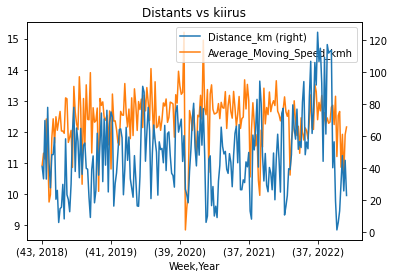

In [24]:
dfp.plot(secondary_y='Distance_km',title="Distants vs kiirus")

In [25]:
df.corr()

,Activity_ID,Distance_km,Average_Speed_kmh,Average_Moving_Speed_kmh,Max_Speed_kmh,Max_Heart_Rate_bpm,Average_Heart_Rate_bpm,Calories,VO2max,Aerobic_Training_Effect,Anaerobic_Training_Effect,Avg_Run_Cadence,Max_Run_Cadence,Stride_Length,Steps,Ground_Contact_Time,GCT_Balance_,verticalOscillation,verticalRatio,maxVerticalSpeed,Week,Year
Activity_ID,1.000000,0.205777,0.366817,0.084181,0.157568,0.346835,0.367696,0.300426,-0.130686,0.334605,0.217924,0.346489,0.345215,0.052548,0.225112,0.303303,0.318806,0.327572,0.316533,0.408806,0.034522,0.597541
Distance_km,0.205777,1.000000,0.624086,0.138159,0.586484,0.533050,0.517347,0.850047,0.320106,0.622098,0.269015,0.430417,0.593159,0.174778,0.841999,0.255974,0.261161,0.257581,0.246953,0.104015,0.081337,-0.110412
Average_Speed_kmh,0.366817,0.624086,1.000000,0.197265,0.498723,0.735049,0.809615,0.459499,0.415865,0.751709,0.141121,0.871316,0.799345,0.170507,0.566366,0.269077,0.288151,0.297802,0.273056,0.196289,0.081903,-0.063520
Average_Moving_Speed_kmh,0.084181,0.138159,0.197265,1.000000,0.099024,0.161860,0.173845,0.097573,0.048762,0.151314,0.023333,0.179444,0.169400,0.033350,0.135890,0.114385,0.117551,0.130007,0.121214,0.022624,-0.021446,0.010804
Max_Speed_kmh,0.157568,0.586484,0.498723,0.099024,1.000000,0.474742,0.430403,0.413520,0.109033,0.384484,0.251658,0.285581,0.532311,0.171080,0.396407,0.132938,0.126548,0.114448,0.123785,0.077293,0.062185,-0.168106
Max_Heart_Rate_bpm,0.346835,0.533050,0.735049,0.161860,0.474742,1.000000,0.974020,0.513328,0.396658,0.799729,0.252243,0.750418,0.795279,0.136148,0.608096,0.252069,0.253884,0.248790,0.245540,0.140348,0.050287,-0.179668
Average_Heart_Rate_bpm,0.367696,0.517347,0.809615,0.173845,0.430403,0.974020,1.000000,0.497235,0.443258,0.840238,0.195579,0.832724,0.806471,0.126481,0.599876,0.265234,0.273603,0.275233,0.264022,0.158572,0.051275,-0.138687
Calories,0.300426,0.850047,0.459499,0.097573,0.413520,0.513328,0.497235,1.000000,0.355805,0.700266,0.368299,0.407052,0.524879,0.072193,0.851763,0.279119,0.281328,0.273924,0.266704,0.138889,0.053399,-0.093340
VO2max,-0.130686,0.320106,0.415865,0.048762,0.109033,0.396658,0.443258,0.355805,1.000000,0.487830,-0.107082,0.466784,0.348870,0.010178,0.403381,0.059608,0.057475,0.048113,0.051142,-0.201679,0.018700,-0.330644
Aerobic_Training_Effect,0.334605,0.622098,0.751709,0.151314,0.384484,0.799729,0.840238,0.700266,0.487830,1.000000,0.397233,0.782566,0.751540,0.083799,0.707625,0.316623,0.329250,0.328412,0.311449,0.254014,0.078618,-0.044364


Graphs - volume

<AxesSubplot:xlabel='Year,Week'>

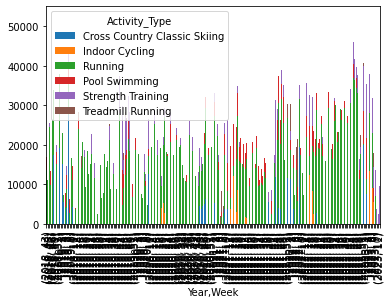

In [26]:
piv=df.pivot_table(values = 'Duration_hms', index = ['Year','Week'], columns = 'Activity_Type', aggfunc = "sum",fill_value='0 days 00:00:00')
#pd.set_option('display.max_rows', None)
piv=piv[['Cross Country Classic Skiing','Indoor Cycling','Running','Pool Swimming','Strength Training','Treadmill Running']]
piv['Cross Country Classic Skiing']=piv['Cross Country Classic Skiing'].dt.total_seconds()
piv['Indoor Cycling']=piv['Indoor Cycling'].dt.total_seconds()
piv['Running']=piv['Running'].dt.total_seconds()
piv['Pool Swimming']=piv['Pool Swimming'].dt.total_seconds()
piv['Strength Training']=piv['Strength Training'].dt.total_seconds()
piv['Treadmill Running']=piv['Treadmill Running'].dt.total_seconds()
piv.plot(kind='bar',stacked=True)

In [27]:
piv.index

MultiIndex([(2018, 43),
            (2018, 44),
            (2018, 45),
            (2018, 46),
            (2018, 47),
            (2018, 48),
            (2018, 49),
            (2018, 50),
            (2018, 51),
            (2018, 52),
            ...
            (2023,  1),
            (2023,  2),
            (2023,  3),
            (2023,  4),
            (2023,  5),
            (2023,  6),
            (2023,  7),
            (2023,  9),
            (2023, 10),
            (2023, 11)],
           names=['Year', 'Week'], length=229)

Graphs - technique

In [28]:
df=df.sort_values(by=['Start_Time'])
df.GCT_Balance_=df.GCT_Balance_.replace(0.0,math.nan)
df['GCTB_SMA7'] = df['GCT_Balance_'].rolling(7,min_periods=1).mean()
#df.GCT_Balance_=df.GCT_Balance_.replace(math.nan,0.0)
df['GCTB_SMA7'] = np.where((df['GCT_Balance_']==math.nan), math.nan, df['GCTB_SMA7'])
df.head()

,Start_Time,End_Time,Activity_ID,Activity_Name,Location_Name,Duration_hms,Elapsed_Duration_hms,Moving_Duration_hms,Activity_Parent,Activity_Type,Distance_km,Average_Speed_kmh,Average_Moving_Speed_kmh,Max_Speed_kmh,Max_Heart_Rate_bpm,Average_Heart_Rate_bpm,Calories,VO2max,Aerobic_Training_Effect,Anaerobic_Training_Effect,Avg_Run_Cadence,Max_Run_Cadence,Stride_Length,Steps,Ground_Contact_Time,GCT_Balance_,verticalOscillation,verticalRatio,maxVerticalSpeed,Week,Year,GCTB_SMA7
1737,2018-10-26,2018-10-26,3.118561e+09,Tallinn Running,Tallinn,0 days 00:09:50,0 days 00:09:50,0 days 00:09:29,Any Activity Type,Running,1.61351,9.853200,10.208499,11.588400,161.0,148.0,94.0,0.0,2.4,0.0,137.78,223.0,122.63,1386.0,0.0,NaN,0.0,0.0,0.119971,43,2018,NaN
1736,2018-10-27,2018-10-27,3.118968e+09,Tallinn Running,Tallinn,0 days 01:17:30,0 days 01:17:30,0 days 01:16:00,Any Activity Type,Running,14.43658,11.174400,11.397300,13.604400,188.0,162.0,817.0,46.0,5.0,3.3,170.64,180.0,109.09,13130.0,0.0,NaN,0.0,0.0,1.400002,43,2018,NaN
1735,2018-10-27,2018-10-27,3.119738e+09,Tallinn Running,Tallinn,0 days 00:25:14,0 days 00:25:14,0 days 00:24:53,Any Activity Type,Running,3.93387,9.356400,9.485554,13.233600,158.0,128.0,185.0,48.0,2.6,0.3,111.53,178.0,369.82,3016.0,0.0,NaN,0.0,0.0,1.400002,43,2018,NaN
1734,2018-10-27,2018-10-27,3.120984e+09,Tallinn Running,Tallinn,0 days 00:17:27,0 days 00:22:57,0 days 00:15:33,Any Activity Type,Running,3.10168,10.663200,11.967897,14.479199,150.0,136.0,163.0,49.0,2.4,0.1,147.48,184.0,120.62,2584.0,0.0,NaN,0.0,0.0,0.400000,43,2018,NaN
1733,2018-10-28,2018-10-28,3.121460e+09,Saue vald Running,Saue vald,0 days 01:34:54,0 days 01:34:54,0 days 01:33:40,Any Activity Type,Running,18.00000,11.380117,11.530249,15.886800,180.0,152.0,1033.0,49.0,5.0,2.3,170.92,184.0,129.01,16174.0,0.0,NaN,0.0,0.0,0.799999,43,2018,NaN


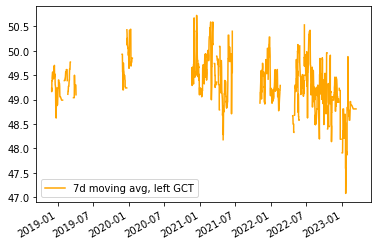

In [29]:
plt.plot(df.Start_Time,df.GCTB_SMA7,color='orange',label="7d moving avg, left GCT")
plt.gcf().autofmt_xdate()
plt.legend(loc="lower left")
#plt.savefig('GCT_SMA7.pdf')